<a href="https://colab.research.google.com/github/CamillaSemenzzatt/Mack/blob/main/Projeto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Path to dataset files: /kaggle/input/bike-sharing-dataset
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801 

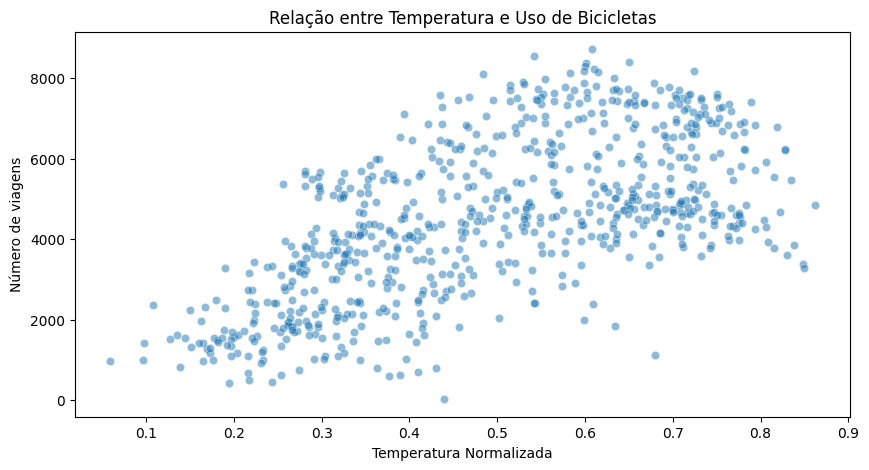

<ipython-input-19-5f4e93a4fcd8>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["weathersit"], y=df["cnt"], palette="coolwarm")


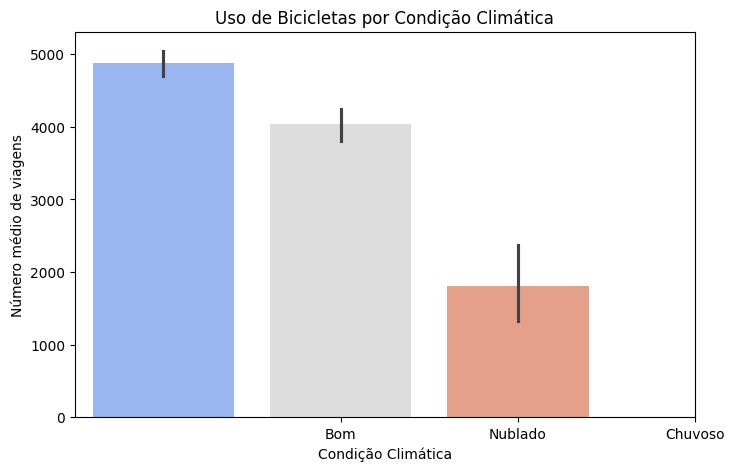

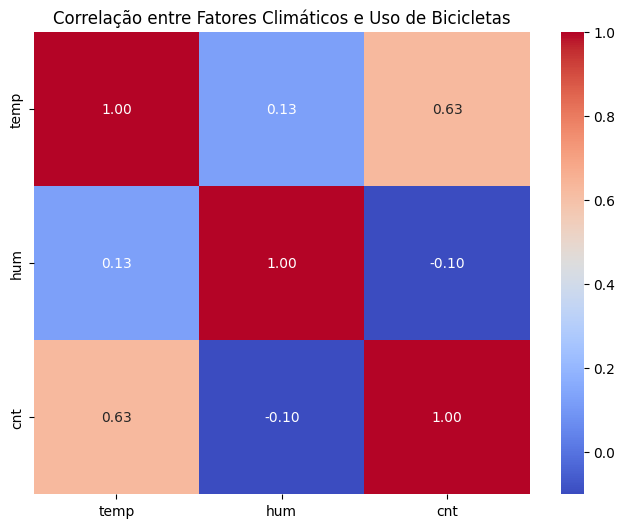

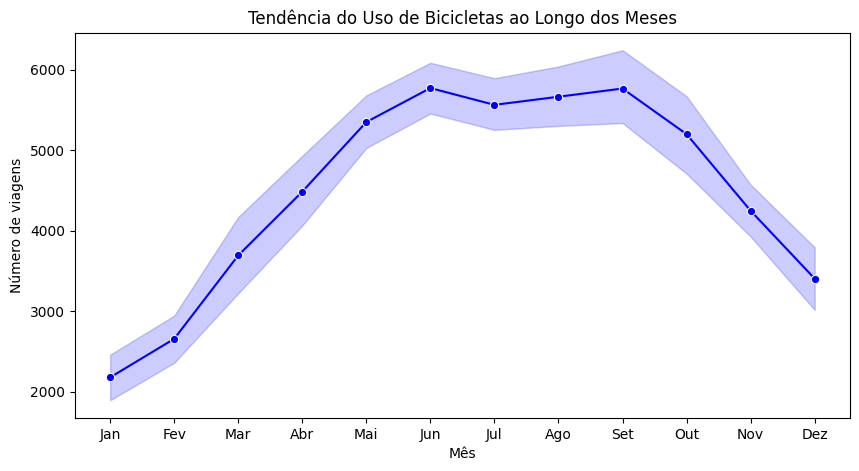


Data Storytelling: Como o Clima Afeta o Uso de Bicicletas?

Cenário:
Lucas, um jovem morador de Washington, D.C., usa bicicletas compartilhadas diariamente para ir ao trabalho.
Nos dias ensolarados, ele pedala tranquilamente. Mas, quando chove, ele opta pelo metrô, notando um aumento na disponibilidade de bicicletas nas estações.
Isso levanta uma questão: será que o clima realmente influencia o número de usuários?

Desenvolvimento:
Para investigar a dúvida de Lucas, analisamos um dataset público do Kaggle, contendo dados sobre o uso de bicicletas ao longo dos dias. A análise gerou quatro visualizações principais:

1. Temperatura x Uso de Bicicletas
   - O número de viagens aumenta significativamente entre 20°C e 25°C.
   - Temperaturas extremas reduzem o uso de bicicletas.

2. Condição Climática x Uso de Bicicletas
   - Dias ensolarados registram o maior número de viagens.
   - Dias chuvosos apresentam uma queda expressiva na demanda.

3. Mapa de Calor - Correlação Climática
   - Umid

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")

print("Path to dataset files:", path)

file_path = os.path.join(path, "day.csv")
df = pd.read_csv(file_path)

print(df.head())

print(df.isnull().sum())

df.dropna(inplace=True)

df["date"] = pd.to_datetime(df["dteday"])

df["month"] = df["date"].dt.month

plt.figure(figsize=(10,5))
sns.scatterplot(x=df["temp"], y=df["cnt"], alpha=0.5)
plt.xlabel("Temperatura Normalizada")
plt.ylabel("Número de viagens")
plt.title("Relação entre Temperatura e Uso de Bicicletas")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=df["weathersit"], y=df["cnt"], palette="coolwarm")
plt.xlabel("Condição Climática")
plt.ylabel("Número médio de viagens")
plt.title("Uso de Bicicletas por Condição Climática")
plt.xticks([1, 2, 3], ["Bom", "Nublado", "Chuvoso"])
plt.show()

plt.figure(figsize=(8,6))
corr = df[["temp", "hum", "cnt"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre Fatores Climáticos e Uso de Bicicletas")
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(x=df["month"], y=df["cnt"], marker="o", color="blue")
plt.xlabel("Mês")
plt.ylabel("Número de viagens")
plt.title("Tendência do Uso de Bicicletas ao Longo dos Meses")
plt.xticks(range(1,13), ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"])
plt.show()

narrativa = """
Data Storytelling: Como o Clima Afeta o Uso de Bicicletas?

Cenário:
Lucas, um jovem morador de Washington, D.C., usa bicicletas compartilhadas diariamente para ir ao trabalho.
Nos dias ensolarados, ele pedala tranquilamente. Mas, quando chove, ele opta pelo metrô, notando um aumento na disponibilidade de bicicletas nas estações.
Isso levanta uma questão: será que o clima realmente influencia o número de usuários?

Desenvolvimento:
Para investigar a dúvida de Lucas, analisamos um dataset público do Kaggle, contendo dados sobre o uso de bicicletas ao longo dos dias. A análise gerou quatro visualizações principais:

1. Temperatura x Uso de Bicicletas
   - O número de viagens aumenta significativamente entre 20°C e 25°C.
   - Temperaturas extremas reduzem o uso de bicicletas.

2. Condição Climática x Uso de Bicicletas
   - Dias ensolarados registram o maior número de viagens.
   - Dias chuvosos apresentam uma queda expressiva na demanda.

3. Mapa de Calor - Correlação Climática
   - Umidade alta está negativamente associada ao uso de bicicletas.
   - Temperaturas moderadas apresentam correlação positiva com o uso.

4. Uso ao Longo dos Meses
   - A demanda é maior na primavera e verão, e reduz significativamente no inverno.

Conclusão e Chamadas para Ação:
Para mitigar o impacto do clima e incentivar o uso contínuo das bicicletas, algumas soluções podem ser implementadas:

- Ciclovias cobertas, garantindo proteção contra chuva e condições adversas.
- Modelos preditivos de demanda, otimizando a distribuição das bicicletas conforme as condições climáticas.
- Campanhas educativas, promovendo o uso de bicicletas em diferentes tipos de clima.

Com essas iniciativas, é possível melhorar a experiência dos usuários e aumentar a adesão ao serviço de bicicletas compartilhadas.

Análise concluída! Todas as visualizações foram geradas.
"""

print(narrativa)